In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
df.drop('Name',axis=1,inplace=True)
df.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


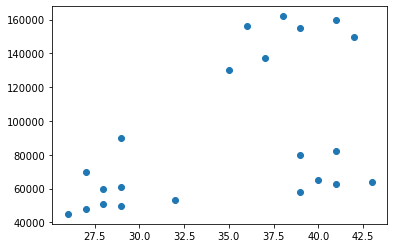

In [4]:
plt.scatter(df['Age'],df['Income($)'],cmap='rainbow')

In [5]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [6]:
x=df
x.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [7]:
y_pred=km.fit_predict(x)
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [8]:
df['clusters']=y_pred

In [9]:
df.head(3)

,Age,Income($),clusters
0,27,70000,2
1,29,90000,2
2,29,61000,0


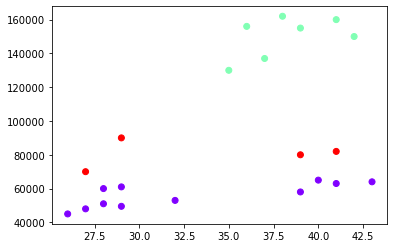

In [10]:
plt.scatter(df['Age'],df['Income($)'],c=df['clusters'],cmap='rainbow')

#### Here we can see data are not well scaled

In [11]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [12]:
new_df=x.copy()
new_df.drop('clusters',axis=1,inplace=True)
new_df.head(3)

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000


In [13]:
new_df['Age']=scale.fit_transform(df[['Age']])
new_df['Income($)']=scale.fit_transform(df[['Income($)']])

In [14]:
new_df.head()

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417


In [15]:
km=KMeans(n_clusters=3)
ynew_pred=km.fit_predict(new_df)
ynew_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
new_df['clusters']=ynew_pred

In [17]:
new_df.head(10)

,Age,Income($),clusters
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,2
5,0.725332,1.519048,2
6,1.072230,1.636679,2
7,0.551883,1.683732,2
8,0.204985,1.542574,2
9,0.031536,0.930891,2


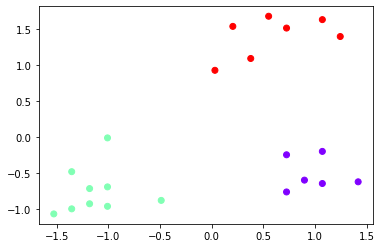

In [18]:
plt.scatter(new_df['Age'],new_df['Income($)'],c=new_df['clusters'],cmap='rainbow')

In [19]:
km.cluster_centers_

array([[ 0.98550535, -0.51205261],
       [-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653]])

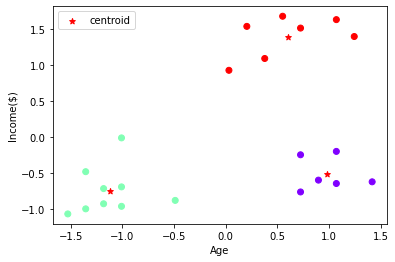

In [20]:
plt.scatter(new_df['Age'],new_df['Income($)'],c=new_df['clusters'],cmap='rainbow')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='red',label='centroid')
plt.legend()
plt.show()

In [25]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(new_df[['Age','Income($)']])
    wcss_in=km.inertia_
    wcss.append(wcss_in)

C:\Users\visha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
wcss

[43.99999999999999,
 16.194890274706772,
 3.8893086571301416,
 2.8287633800935246,
 2.2002272908434253,
 1.8664232496745168,
 1.43978752209624,
 1.103103775556412,
 0.90802453152557,
 0.6636093097791305]

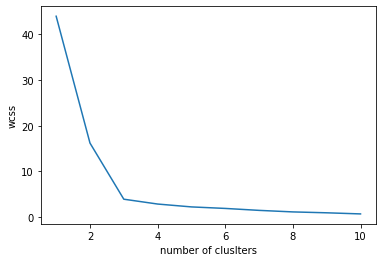

In [27]:
plt.plot(range(1,11),wcss)
plt.xlabel('number of cluslters')
plt.ylabel('wcss')
plt.show()